In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
main = pd.read_csv('Family Income and Expenditure.csv')
income_annually = main.iloc[:, :2]
income_monthly=pd.DataFrame({
    'Monthly Income':(income_annually['Total Household Income']/12).astype(int),
    "Region":income_annually["Region"]
})

In [5]:
average_income = income_monthly.groupby("Region", as_index=False)["Monthly Income"].mean()
average_income["Monthly Income"] = average_income["Monthly Income"].astype(int)
average_income = average_income.sort_values(by='Monthly Income', ascending=False)


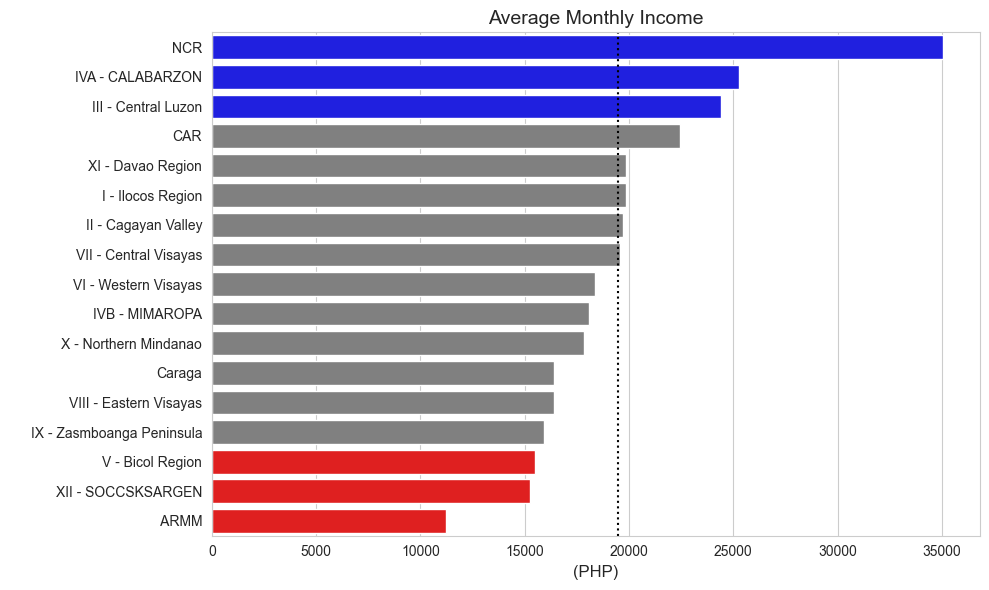

In [6]:
# Calculate overall average
overall_avg = average_income['Monthly Income'].mean()

# Assign color labels
color_labels = ['blue'] * 3 + ['gray'] * (len(average_income) - 6) + ['red'] * 3
average_income['Color'] = color_labels

# Plot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(
    data=average_income,
    x='Monthly Income',
    y='Region',
    hue='Color',
    palette={'blue': 'blue', 'gray': 'gray', 'red': 'red'},
    dodge=False,
    legend=False
)

# Add dotted line for overall average
plt.axvline(overall_avg, color='black', linestyle='dotted', linewidth=1.5)

# Titles and labels
plt.title('Average Monthly Income', fontsize=14)
plt.xlabel('(PHP)', fontsize=12)
plt.ylabel(' ', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [13]:
# ...existing code...
# --- NCR plot ---
plt.figure(figsize=(10, 5))
ncr_data = income_monthly[income_monthly["Region"] == "NCR"]

sns.histplot(ncr_data["Monthly Income"], bins=1000, color="skyblue", edgecolor="none", alpha=0.7, stat='density')
sns.kdeplot(ncr_data["Monthly Income"], color='red', linewidth=2)

plt.title("NCR", fontsize=16, weight="bold")
plt.xlabel("")
plt.ylabel("")  # Remove y-axis label
plt.gca().set_yticks([])  # Remove y-axis ticks and tick labels
plt.gca().xaxis.set_major_formatter(k_formatter)
plt.gca().legend_.remove() if plt.gca().get_legend() else None  # Remove legend if present
plt.xlim(xlim)
ncr_mean = ncr_data["Monthly Income"].mean()
plt.axvline(ncr_mean, color="green", linestyle="dotted", linewidth=2)
plt.tight_layout()
plt.show()

# --- 4x4 grid for other regions ---
other_regions = [r for r in regions if r != "NCR"]

fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.flatten()

for i, region in enumerate(other_regions):
    ax = axes[i]
    region_data = income_monthly[income_monthly["Region"] == region]
    sns.histplot(region_data["Monthly Income"], bins=1000, color="skyblue", edgecolor="none", ax=ax, alpha=0.7, stat='density')
    sns.kdeplot(region_data["Monthly Income"], color='red', linewidth=2, ax=ax)
    ax.set_title(region, fontsize=11, weight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")  # Remove y-axis label
    ax.set_yticks([])  # Remove y-axis ticks and tick labels
    ax.xaxis.set_major_formatter(k_formatter)
    if ax.get_legend():
        ax.get_legend().remove()  # Remove legend if present
    ax.set_xlim(xlim)
    region_mean = region_data["Monthly Income"].mean()
    ax.axvline(region_mean, color="green", linestyle="dotted", linewidth=2)

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Monthly Income Distribution by Region", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0,

SyntaxError: incomplete input (4266858311.py, line 48)